In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from gaia_spec import *
from lsst.sims.photUtils import Sed, Bandpass

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/yoachim/gitRepos/sims_catalogs/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/yoachim/gitRepos/sims_catalogs/python/lsst/sims/catalogs/db/dbConnection.py:439: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


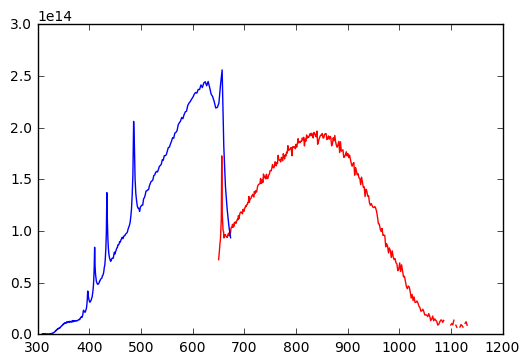

In [2]:
response = gaia_response()
plt.plot(response.red_wavelen, 1./response.red_response, color='r')
plt.plot(response.blue_wavelen, 1./response.blue_response, color='b')

(200, 1400)

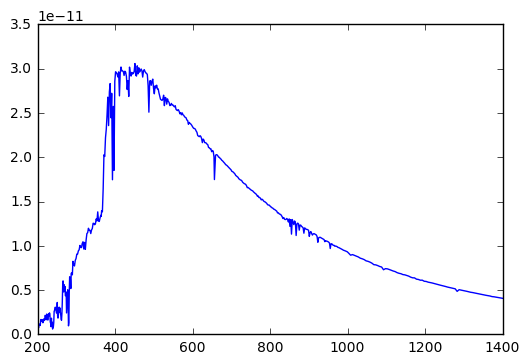

In [28]:
mag = 8
sed = Sed()
sed.read_close_SED(6000., 0., 4.4)
imsimBand = Bandpass()
imsimBand.imsimBandpass()
fNorm = sed.calcFluxNorm(mag, imsimBand)
sed.multiplyFluxNorm(fNorm)
plt.plot(sed.wavelen, sed.flambda)
plt.xlim([200,1400])

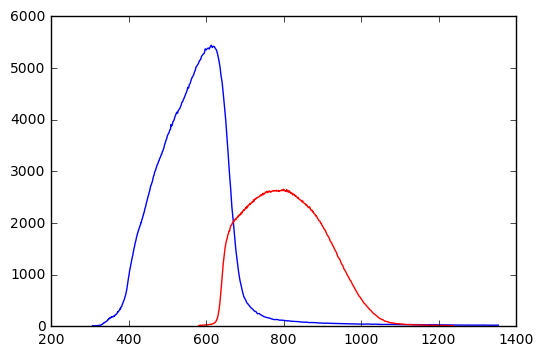

In [29]:
gaia_sed = SED2GAIA(sed)
plt.plot(gaia_sed['BP_wave'], gaia_sed['noisySpec'][0]['BPNoisySpec'], color='b')
plt.plot(gaia_sed['RP_wave'], gaia_sed['noisySpec'][0]['RPNoisySpec'], color='r')

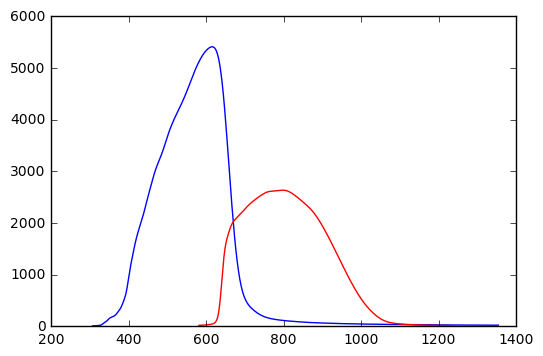

In [30]:
plt.plot(gaia_sed['BP_wave'], gaia_sed['noiseFreeSpec']['BPNoiseFreeSpec'], color='b')
plt.plot(gaia_sed['RP_wave'], gaia_sed['noiseFreeSpec']['RPNoiseFreeSpec'], color='r')

In [31]:
blue_normed = response.apply(gaia_sed['noisySpec'][0]['BPNoisySpec'],  blue=True)
red_normed = response.apply(gaia_sed['noisySpec'][0]['RPNoisySpec'],  blue=False)

(300, 1400)

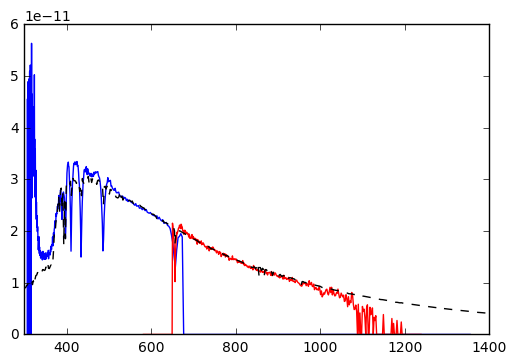

In [32]:
plt.plot(gaia_sed['BP_wave'], blue_normed, color='b')
plt.plot(gaia_sed['RP_wave'], red_normed, color='r')
plt.plot(sed.wavelen, sed.flambda, 'k--')
plt.xlim([300,1400])
#plt.ylim([0,1e-14])

(300, 1400)

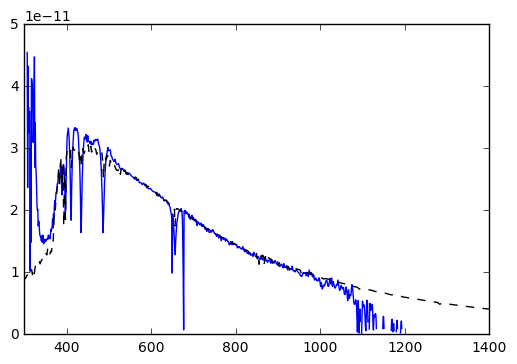

In [33]:
rt_sed = ulysses2SED(data=gaia_sed)
plt.plot(rt_sed.wavelen, rt_sed.flambda)
plt.plot(sed.wavelen, sed.flambda, 'k--')
plt.xlim([300,1400])

(300, 1400)

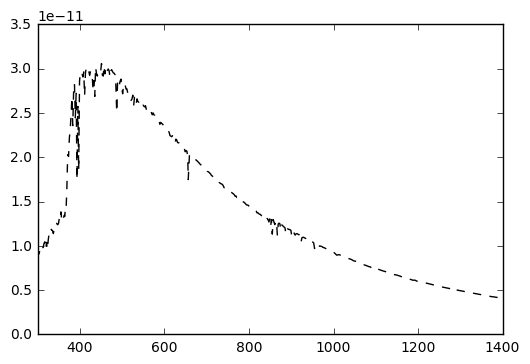

In [34]:
plt.plot(sed.wavelen, sed.flambda, 'k--')
plt.xlim([300,1400])

In [35]:
throughPath = os.path.join(getPackageDir('throughputs'), 'baseline')
lsstKeys = ['u', 'g', 'r', 'i', 'z', 'y']
# lsstKeys = ['r']
bps = {}
for key in lsstKeys:
    bp = np.loadtxt(os.path.join(throughPath, 'total_'+key+'.dat'),
                    dtype=zip(['wave', 'trans'], [float]*2))
    bpTemp = Bandpass()
    good = np.where(bp['trans'] > 0.)
    bpTemp.setBandpass(bp['wave'], bp['trans'], wavelen_min=bp['wave'][good].min(),
                       wavelen_max=bp['wave'][good].max())
    bps[key] = bpTemp


In [36]:
for key in lsstKeys:
    print key, sed.calcMag(bps[key]),rt_sed.calcMag(bps[key]) 

u 9.09666532887 nan
g 8.0626928721 8.05954721114
r 7.7670099484 7.80608247826
i 7.68488649744 7.68979843022
z 7.67216370203 7.69120159165
y 7.66816777904 nan


In [19]:
bps['y'].wavelen_max

1099.5

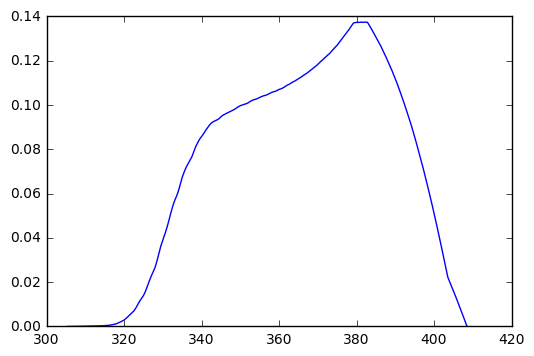

In [21]:
plt.plot(bps['u'].wavelen, bps['u'].sb)